<a href="https://colab.research.google.com/github/HofstraDoboli/TextMining_F22/blob/main/notebook1_nlp_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from nltk import sent_tokenize
from nltk import download
download('punkt')

text1 = '''"Why didn't she text me back yet? She doesn't like me anymore!" There's no way I'm trying out for the team.'''

sents = sent_tokenize(text1)

for i, s in enumerate(sents):
  print(i+1, s)

1 "Why didn't she text me back yet?
2 She doesn't like me anymore!"
3 There's no way I'm trying out for the team.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
words = re.split(r'[.,!? "\']', text1)
print(words)

['', 'Why', 'didn', 't', 'she', 'text', 'me', 'back', 'yet', '', 'She', 'doesn', 't', 'like', 'me', 'anymore', '', '', 'There', 's', 'no', 'way', 'I', 'm', 'trying', 'out', 'for', 'the', 'team', '']


In [22]:
text2 = '''USB4 is done, the group developing the next version of the immensely successful USB connector technology said Tuesday. USB4 doubles speeds compared to today's fastest USB 3.2 by incorporating Intel's speedy Thunderbolt technology that you already see on high-end laptops and peripherals. The USB Implementers Forum announced the completion of the technical specification Tuesday, a move that frees hardware and software engineers to get cracking building the actual products to support it.

Today's USB 3.2, which enables data transfer speeds up to 20 gigabits per second, is still something of a rarity; most of us have earlier versions of the technology that works at 5Gbps or 10Gbps. USB4 promises a speed boost to 40Gbps, helpful for things like using multiple external displays or fetching files from external hard drives.'''
sents2= sent_tokenize(text2)
for i, s in enumerate(sents2):
  print(i+1, s)

1 USB4 is done, the group developing the next version of the immensely successful USB connector technology said Tuesday.
2 USB4 doubles speeds compared to today's fastest USB 3.2 by incorporating Intel's speedy Thunderbolt technology that you already see on high-end laptops and peripherals.
3 The USB Implementers Forum announced the completion of the technical specification Tuesday, a move that frees hardware and software engineers to get cracking building the actual products to support it.
4 Today's USB 3.2, which enables data transfer speeds up to 20 gigabits per second, is still something of a rarity; most of us have earlier versions of the technology that works at 5Gbps or 10Gbps.
5 USB4 promises a speed boost to 40Gbps, helpful for things like using multiple external displays or fetching files from external hard drives.


In [3]:
from nltk import word_tokenize
words = word_tokenize(text1)
print(words)

['``', 'Why', 'did', "n't", 'she', 'text', 'me', 'back', 'yet', '?', 'She', 'does', "n't", 'like', 'me', 'anymore', '!', "''", 'There', "'s", 'no', 'way', 'I', "'m", 'trying', 'out', 'for', 'the', 'team', '.']


In [13]:
from string import punctuation
print(punctuation)

words_no_punkt = [w for w in words if w[0] not in punctuation] # list comprehension
'''l = []
for w in words:
    if w[0] not in punctuation:
        l.append(w)'''
print(words_no_punkt)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['Why', 'did', "n't", 'she', 'text', 'me', 'back', 'yet', 'She', 'does', "n't", 'like', 'me', 'anymore', 'There', 'no', 'way', 'I', 'trying', 'out', 'for', 'the', 'team']


In [11]:
# lower case all words
words_lower = [w.lower() for w in words_no_punkt]
print("# words lowercase", len(words_lower))
print(words_lower)

# words lowercase 23
['why', 'did', "n't", 'she', 'text', 'me', 'back', 'yet', 'she', 'does', "n't", 'like', 'me', 'anymore', 'there', 'no', 'way', 'i', 'trying', 'out', 'for', 'the', 'team']


In [12]:
download('stopwords')
from nltk.corpus import stopwords
print("number stopwords", len(stopwords.words("english")))
print(stopwords.words("english"))
words_no_stop = [w for w in words_lower if w not in stopwords.words("english")]
print('# words no stopwords', len(words_no_stop))
print(words_no_stop)

number stopwords 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 's

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# attach parts of speech - for words in each sentence 
from nltk import pos_tag
download('averaged_perceptron_tagger')

sents = sent_tokenize(text2.lower())
words_pos = []
for s in sents: # for each sentence
  words_s = word_tokenize(s)
  pos_sents = pos_tag(words_s) # extract parts of speech
  print(pos_sents)
  words_pos.extend(pos_sents) # different than append 
print(words_pos)

[('usb4', 'NN'), ('is', 'VBZ'), ('done', 'VBN'), (',', ','), ('the', 'DT'), ('group', 'NN'), ('developing', 'VBG'), ('the', 'DT'), ('next', 'JJ'), ('version', 'NN'), ('of', 'IN'), ('the', 'DT'), ('immensely', 'RB'), ('successful', 'JJ'), ('usb', 'JJ'), ('connector', 'NN'), ('technology', 'NN'), ('said', 'VBD'), ('tuesday', 'NN'), ('.', '.')]
[('usb4', 'JJ'), ('doubles', 'NNS'), ('speeds', 'NNS'), ('compared', 'VBN'), ('to', 'TO'), ('today', 'NN'), ("'s", 'POS'), ('fastest', 'JJS'), ('usb', 'JJ'), ('3.2', 'CD'), ('by', 'IN'), ('incorporating', 'VBG'), ('intel', 'NN'), ("'s", 'POS'), ('speedy', 'JJ'), ('thunderbolt', 'NN'), ('technology', 'NN'), ('that', 'IN'), ('you', 'PRP'), ('already', 'RB'), ('see', 'VB'), ('on', 'IN'), ('high-end', 'JJ'), ('laptops', 'NNS'), ('and', 'CC'), ('peripherals', 'NNS'), ('.', '.')]
[('the', 'DT'), ('usb', 'JJ'), ('implementers', 'NNS'), ('forum', 'VBP'), ('announced', 'VBD'), ('the', 'DT'), ('completion', 'NN'), ('of', 'IN'), ('the', 'DT'), ('technical', '

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [40]:
# eliminate all words that are not nouns, verbs, adj or adverbs
string_keep = 'NVRJ' # N = nouns, 
words_nvrj = [(w,pos[0].lower()) for (w,pos) in words_pos if pos[0] in string_keep]
print('# noun/verbs/adverbs/adj', len(words_nvrj))
print(words_nvrj)


# noun/verbs/adverbs/adj 84
[('usb4', 'n'), ('is', 'v'), ('done', 'v'), ('group', 'n'), ('developing', 'v'), ('next', 'j'), ('version', 'n'), ('immensely', 'r'), ('successful', 'j'), ('usb', 'j'), ('connector', 'n'), ('technology', 'n'), ('said', 'v'), ('tuesday', 'n'), ('usb4', 'j'), ('doubles', 'n'), ('speeds', 'n'), ('compared', 'v'), ('today', 'n'), ('fastest', 'j'), ('usb', 'j'), ('incorporating', 'v'), ('intel', 'n'), ('speedy', 'j'), ('thunderbolt', 'n'), ('technology', 'n'), ('already', 'r'), ('see', 'v'), ('high-end', 'j'), ('laptops', 'n'), ('peripherals', 'n'), ('usb', 'j'), ('implementers', 'n'), ('forum', 'v'), ('announced', 'v'), ('completion', 'n'), ('technical', 'j'), ('specification', 'n'), ('tuesday', 'n'), ('move', 'n'), ('frees', 'v'), ('hardware', 'n'), ('software', 'n'), ('engineers', 'n'), ('get', 'v'), ('cracking', 'v'), ('building', 'v'), ('actual', 'j'), ('products', 'n'), ('support', 'v'), ('today', 'n'), ('usb', 'j'), ('enables', 'v'), ('data', 'n'), ('trans

In [41]:
# show stemming - cuts parts of words that vary with part of speech or tense (Verb)
from nltk.stem import *
stemmer = PorterStemmer()
#non_stemmed_words = [w for (w,pos) in words_nvrj]
stemmed_words = [(w, stemmer.stem(w)) for (w,pos) in words_nvrj]
#print(non_stemmed_words)
print(stemmed_words)

[('usb4', 'usb4'), ('is', 'is'), ('done', 'done'), ('group', 'group'), ('developing', 'develop'), ('next', 'next'), ('version', 'version'), ('immensely', 'immens'), ('successful', 'success'), ('usb', 'usb'), ('connector', 'connector'), ('technology', 'technolog'), ('said', 'said'), ('tuesday', 'tuesday'), ('usb4', 'usb4'), ('doubles', 'doubl'), ('speeds', 'speed'), ('compared', 'compar'), ('today', 'today'), ('fastest', 'fastest'), ('usb', 'usb'), ('incorporating', 'incorpor'), ('intel', 'intel'), ('speedy', 'speedi'), ('thunderbolt', 'thunderbolt'), ('technology', 'technolog'), ('already', 'alreadi'), ('see', 'see'), ('high-end', 'high-end'), ('laptops', 'laptop'), ('peripherals', 'peripher'), ('usb', 'usb'), ('implementers', 'implement'), ('forum', 'forum'), ('announced', 'announc'), ('completion', 'complet'), ('technical', 'technic'), ('specification', 'specif'), ('tuesday', 'tuesday'), ('move', 'move'), ('frees', 'free'), ('hardware', 'hardwar'), ('software', 'softwar'), ('engineer

In [48]:
from nltk.classify.positivenaivebayes import PositiveNaiveBayesClassifier
# show lemmatization 
download('wordnet')
download('omw-1.4')
lemmatizer = WordNetLemmatizer()
# this uses n = nouns, v = verbs, a = adjectives,r = adverbs 
w_lemm = []
for (w,pos) in words_nvrj:
  if pos == 'j':
    pos = 'a'
  #w_lemm.append((w,lemmatizer.lemmatize(w,pos)))
  w_lemm.append(lemmatizer.lemmatize(w,pos))

w_lemm
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['usb4',
 'be',
 'do',
 'group',
 'develop',
 'next',
 'version',
 'immensely',
 'successful',
 'usb',
 'connector',
 'technology',
 'say',
 'tuesday',
 'usb4',
 'double',
 'speed',
 'compare',
 'today',
 'fast',
 'usb',
 'incorporate',
 'intel',
 'speedy',
 'thunderbolt',
 'technology',
 'already',
 'see',
 'high-end',
 'laptop',
 'peripheral',
 'usb',
 'implementers',
 'forum',
 'announce',
 'completion',
 'technical',
 'specification',
 'tuesday',
 'move',
 'free',
 'hardware',
 'software',
 'engineer',
 'get',
 'crack',
 'build',
 'actual',
 'product',
 'support',
 'today',
 'usb',
 'enable',
 'data',
 'transfer',
 'speed',
 'up',
 'gigabit',
 'second',
 'be',
 'still',
 'something',
 'rarity',
 'most',
 'have',
 'early',
 'version',
 'technology',
 'work',
 'usb4',
 'promise',
 'speed',
 'boost',
 'helpful',
 'thing',
 'use',
 'multiple',
 'external',
 'display',
 'fetch',
 'file',
 'external',
 'hard',
 'drive']

In [55]:
# count the frequency of all items in a list
# input = list
# output = a sorted dictionary by frequency frmo the largest to
# the smallest
def counter(items):
  sort_items = sorted(items)
  count_items = {}
  for item in sort_items:
    if item in count_items.keys():
      count_items[item] += 1
    else:
      count_items[item] = 1
  
  # sort by the count, in reverse order
  sorted_count_list = sorted(count_items.items(), 
                            key = lambda x:x[1], reverse = True)
  sorted_count_dict = dict(sorted_count_list)
  return sorted_count_dict 

In [56]:
count_tokens = counter(w_lemm)
count_tokens

{'usb': 4,
 'speed': 3,
 'technology': 3,
 'usb4': 3,
 'be': 2,
 'external': 2,
 'today': 2,
 'tuesday': 2,
 'version': 2,
 'actual': 1,
 'already': 1,
 'announce': 1,
 'boost': 1,
 'build': 1,
 'compare': 1,
 'completion': 1,
 'connector': 1,
 'crack': 1,
 'data': 1,
 'develop': 1,
 'display': 1,
 'do': 1,
 'double': 1,
 'drive': 1,
 'early': 1,
 'enable': 1,
 'engineer': 1,
 'fast': 1,
 'fetch': 1,
 'file': 1,
 'forum': 1,
 'free': 1,
 'get': 1,
 'gigabit': 1,
 'group': 1,
 'hard': 1,
 'hardware': 1,
 'have': 1,
 'helpful': 1,
 'high-end': 1,
 'immensely': 1,
 'implementers': 1,
 'incorporate': 1,
 'intel': 1,
 'laptop': 1,
 'most': 1,
 'move': 1,
 'multiple': 1,
 'next': 1,
 'peripheral': 1,
 'product': 1,
 'promise': 1,
 'rarity': 1,
 'say': 1,
 'second': 1,
 'see': 1,
 'software': 1,
 'something': 1,
 'specification': 1,
 'speedy': 1,
 'still': 1,
 'successful': 1,
 'support': 1,
 'technical': 1,
 'thing': 1,
 'thunderbolt': 1,
 'transfer': 1,
 'up': 1,
 'use': 1,
 'work': 1}

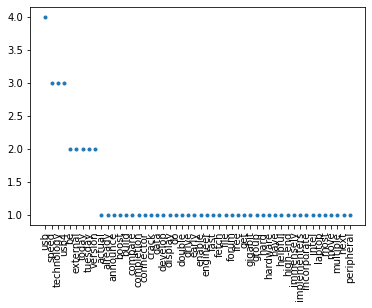

In [68]:
# plot the frequencies versus the words 
import matplotlib.pyplot as plt

max_length = 50
list_words = list(count_tokens.keys())[:max_length]
list_words_chopped = [w[:2] for w in list_words]
plt.plot(list(count_tokens.values())[:max_length], '.')
plt.xticks(ticks=range(min(max_length, len(count_tokens))), labels=list_words, rotation=90)
plt.show()